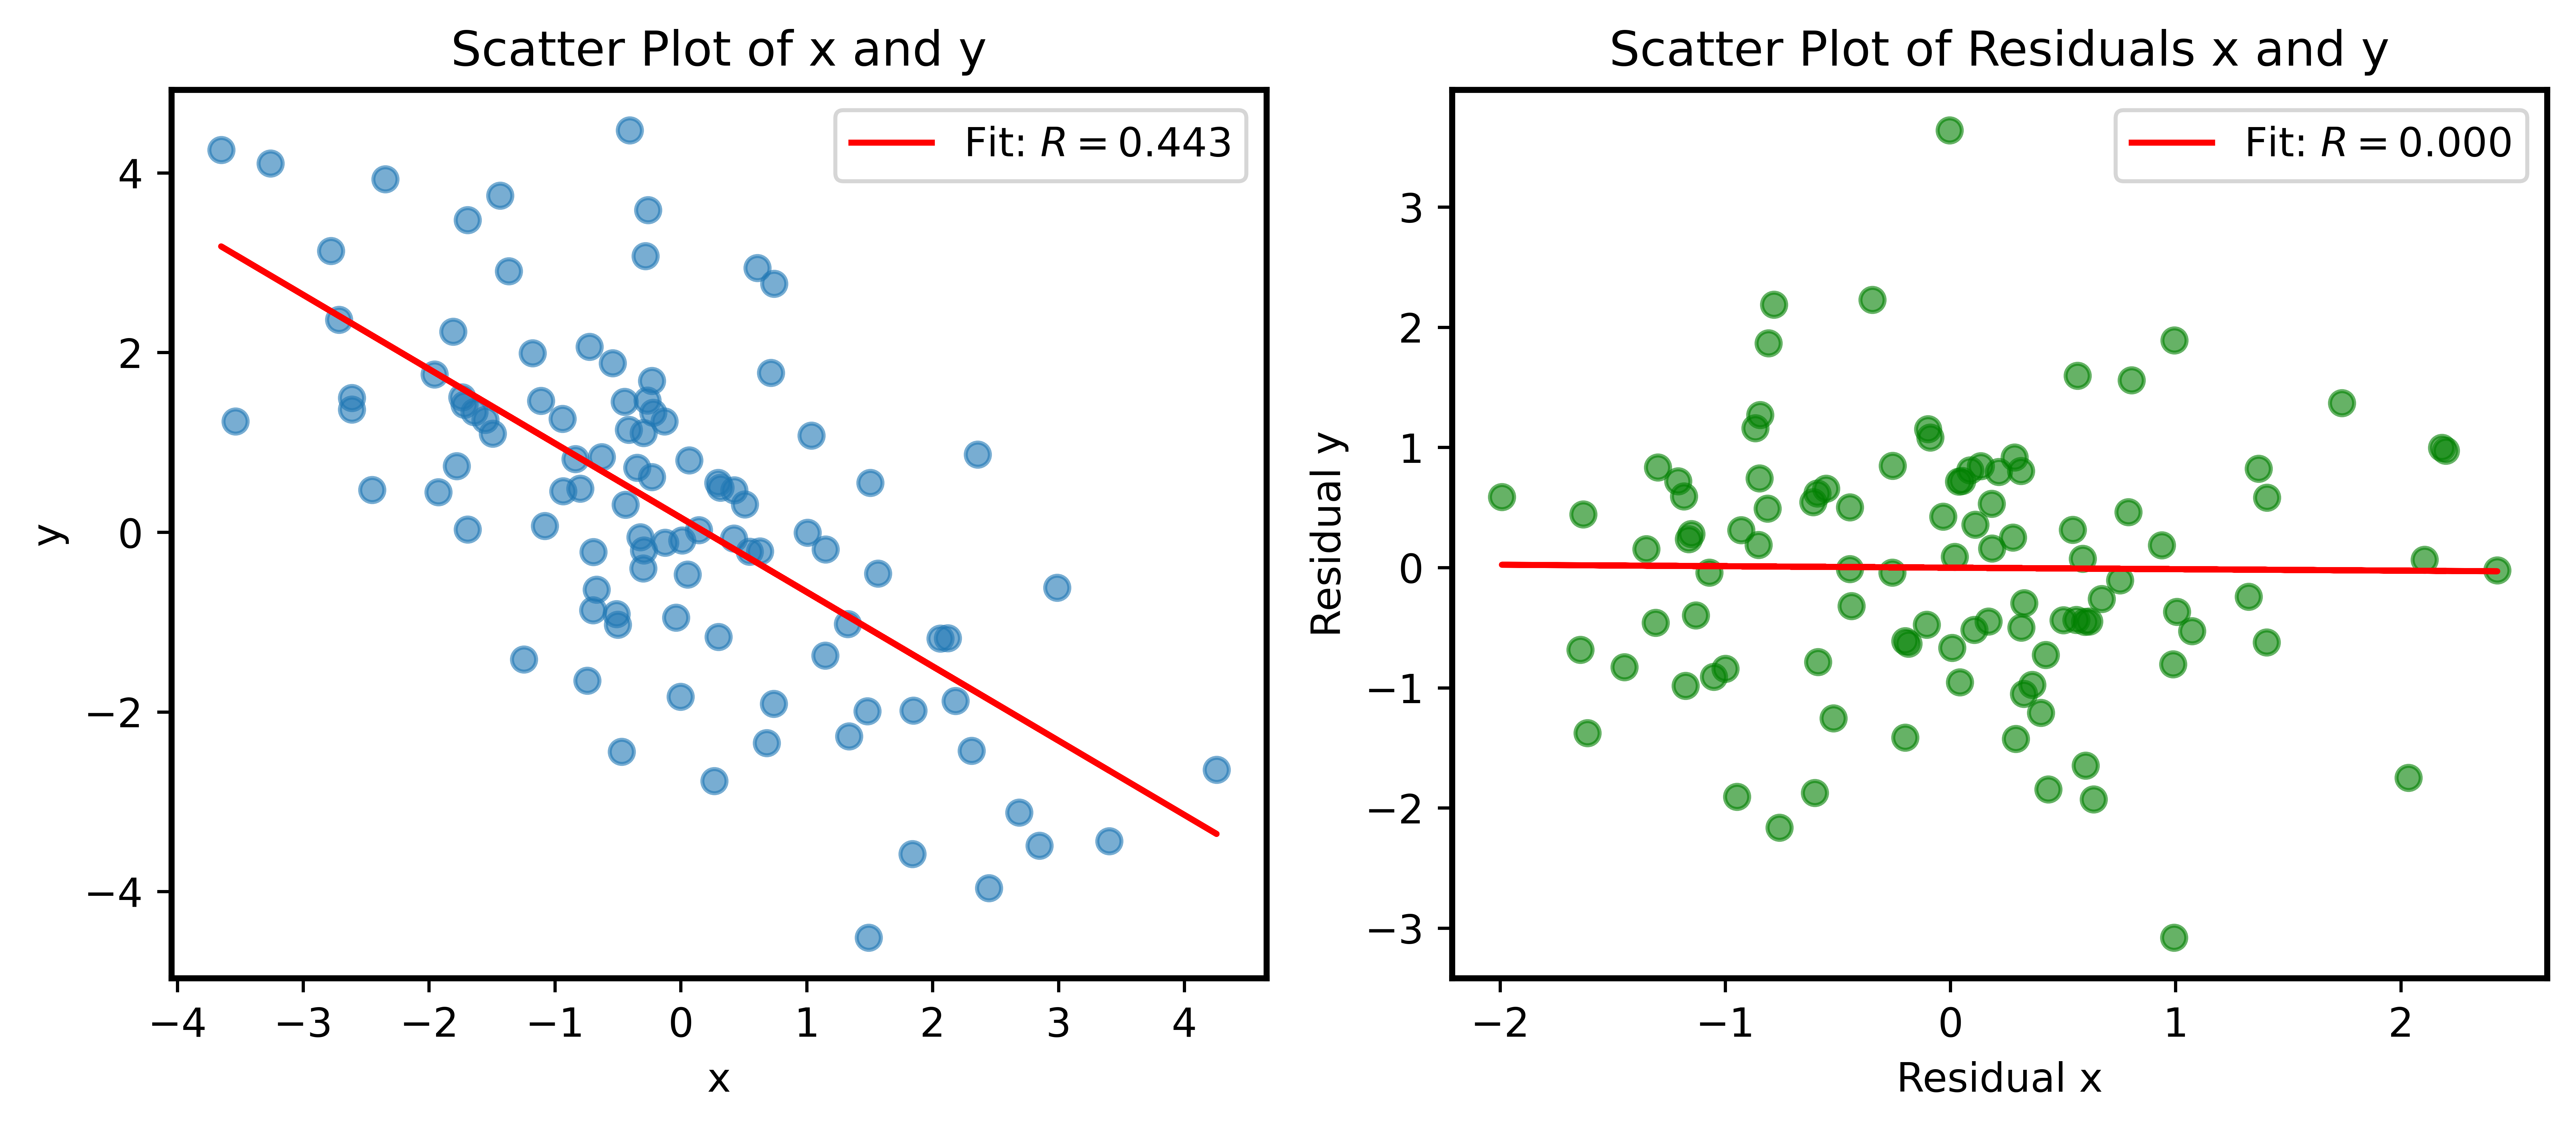

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate synthetic data
np.random.seed(42)
z = np.random.normal(0, 1, 100)
x = 1.5 * z + np.random.normal(0, 1, 100)
y = -2 * z + np.random.normal(0, 1, 100)

# Calculate correlation for original x and y
corr_coeff_xy = np.corrcoef(x, y)[0, 1]

# Fit the model for original data and calculate line
slope_xy, intercept_xy, _, _, _ = linregress(x, y)
line_xy = slope_xy * x + intercept_xy

# Fit the model: y ~ x + z
X = np.column_stack((x, z))
X = sm.add_constant(X)  # adding a constant for the intercept
model = sm.OLS(y, X).fit()

# Extract the residuals
residual_x = sm.OLS(x, sm.add_constant(z)).fit().resid
residual_y = sm.OLS(y, sm.add_constant(z)).fit().resid

# Calculate correlation for residuals
corr_coeff_residuals = np.corrcoef(residual_x, residual_y)[0, 1]

# Fit the line for residuals
slope_res, intercept_res, _, _, _ = linregress(residual_x, residual_y)
line_res = slope_res * residual_x + intercept_res

# Plotting both scatter plots side by side
fig, axes = plt.subplots(1, 2, figsize=(9, 4), dpi=900)

# Scatter plot of x and y
axes[0].scatter(x, y, alpha=0.6)
axes[0].plot(x, line_xy, 'r', label=f'Fit: $R={corr_coeff_xy**2:.3f}$')
axes[0].set_title('Scatter Plot of x and y')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

# Scatter plot of residuals
axes[1].scatter(residual_x, residual_y, alpha=0.6, color='green')
axes[1].plot(residual_x, line_res, 'r', label=f'Fit: $R={corr_coeff_residuals**2:.3f}$')
axes[1].set_title('Scatter Plot of Residuals x and y')
axes[1].set_xlabel('Residual x')
axes[1].set_ylabel('Residual y')
axes[1].legend()

# set the linewidth of the spines to 1.5
for ax in axes:
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


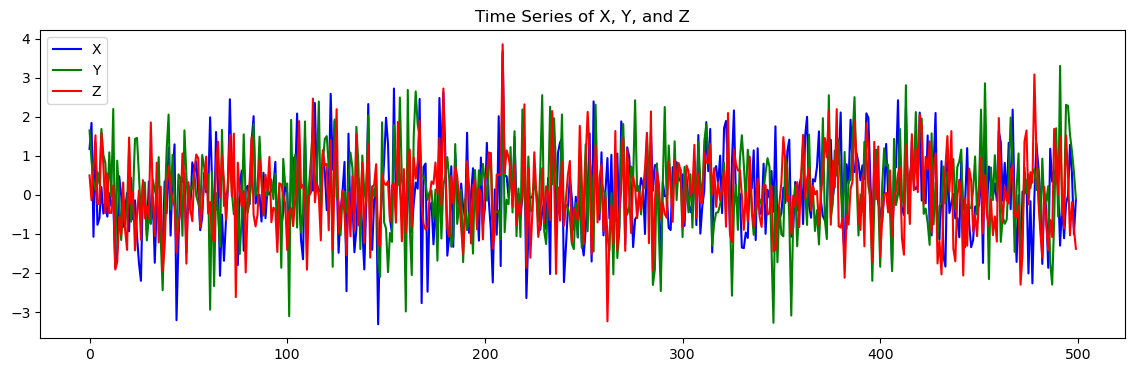

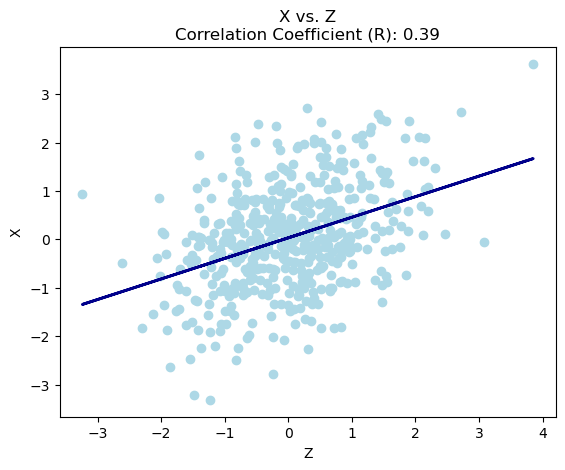

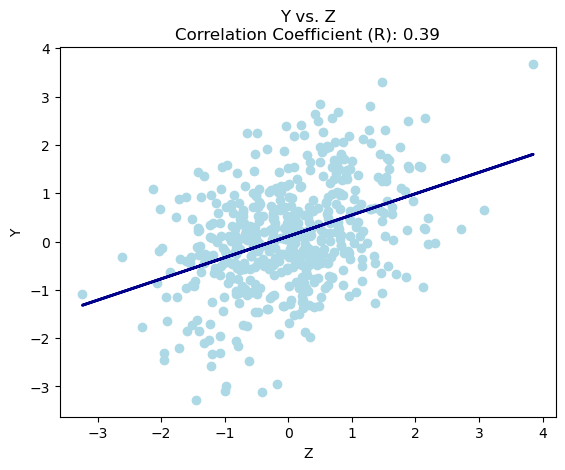

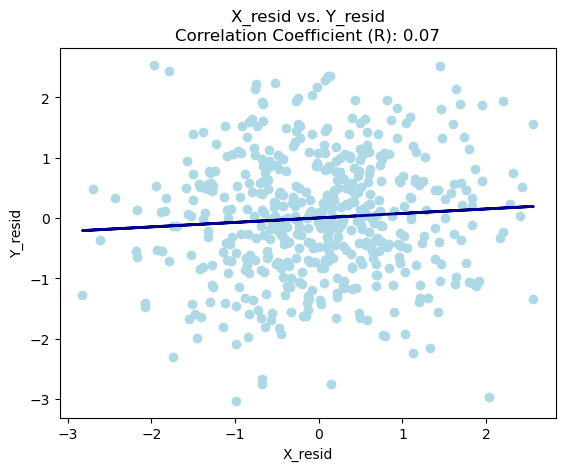

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr

# Seed for reproducibility
np.random.seed(42)

# Number of observations
n = 500

# Simulating Z
Z = np.random.normal(0, 1, n)

# Simulating X and Y given Z (conditionally independent given Z)
X = 0.5 * Z + np.random.normal(0, 1, n)
Y = 0.5 * Z + np.random.normal(0, 1, n)

# Combine into a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})

# Remove the effect of Z from X
X_resid = sm.OLS(data['X'], sm.add_constant(data['Z'])).fit().resid

# Remove the effect of Z from Y
Y_resid = sm.OLS(data['Y'], sm.add_constant(data['Z'])).fit().resid

# Calculate the Pearson correlation of the residuals
partial_corr_coefficient, p_value = pearsonr(X_resid, Y_resid)

# Output the results
partial_corr_coefficient, p_value


# Plotting the time series of X, Y, Z
plt.figure(figsize=(14, 4))
plt.plot(X, label='X', color='blue')
plt.plot(Y, label='Y', color='green')
plt.plot(Z, label='Z', color='red')
plt.title('Time Series of X, Y, and Z')
plt.legend()
plt.show()

# Function to plot with fitted line and correlation
def plot_with_fit(x, y, title, xlabel, ylabel):
    # Fit line
    model = sm.OLS(y, sm.add_constant(x)).fit()
    fit_line = model.predict(sm.add_constant(x))
    
    # Correlation
    corr_coef = np.corrcoef(x, y)[0, 1]
    
    # Plot
    plt.scatter(x, y, color='lightblue')
    plt.plot(x, fit_line, color='darkblue', linewidth=2)  # Fitted line
    plt.title(f'{title}\nCorrelation Coefficient (R): {corr_coef:.2f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# X vs Z
plot_with_fit(Z, X, 'X vs. Z', 'Z', 'X')

# Y vs Z
plot_with_fit(Z, Y, 'Y vs. Z', 'Z', 'Y')

# X_resid vs Y_resid
plot_with_fit(X_resid, Y_resid, 'X_resid vs. Y_resid', 'X_resid', 'Y_resid')


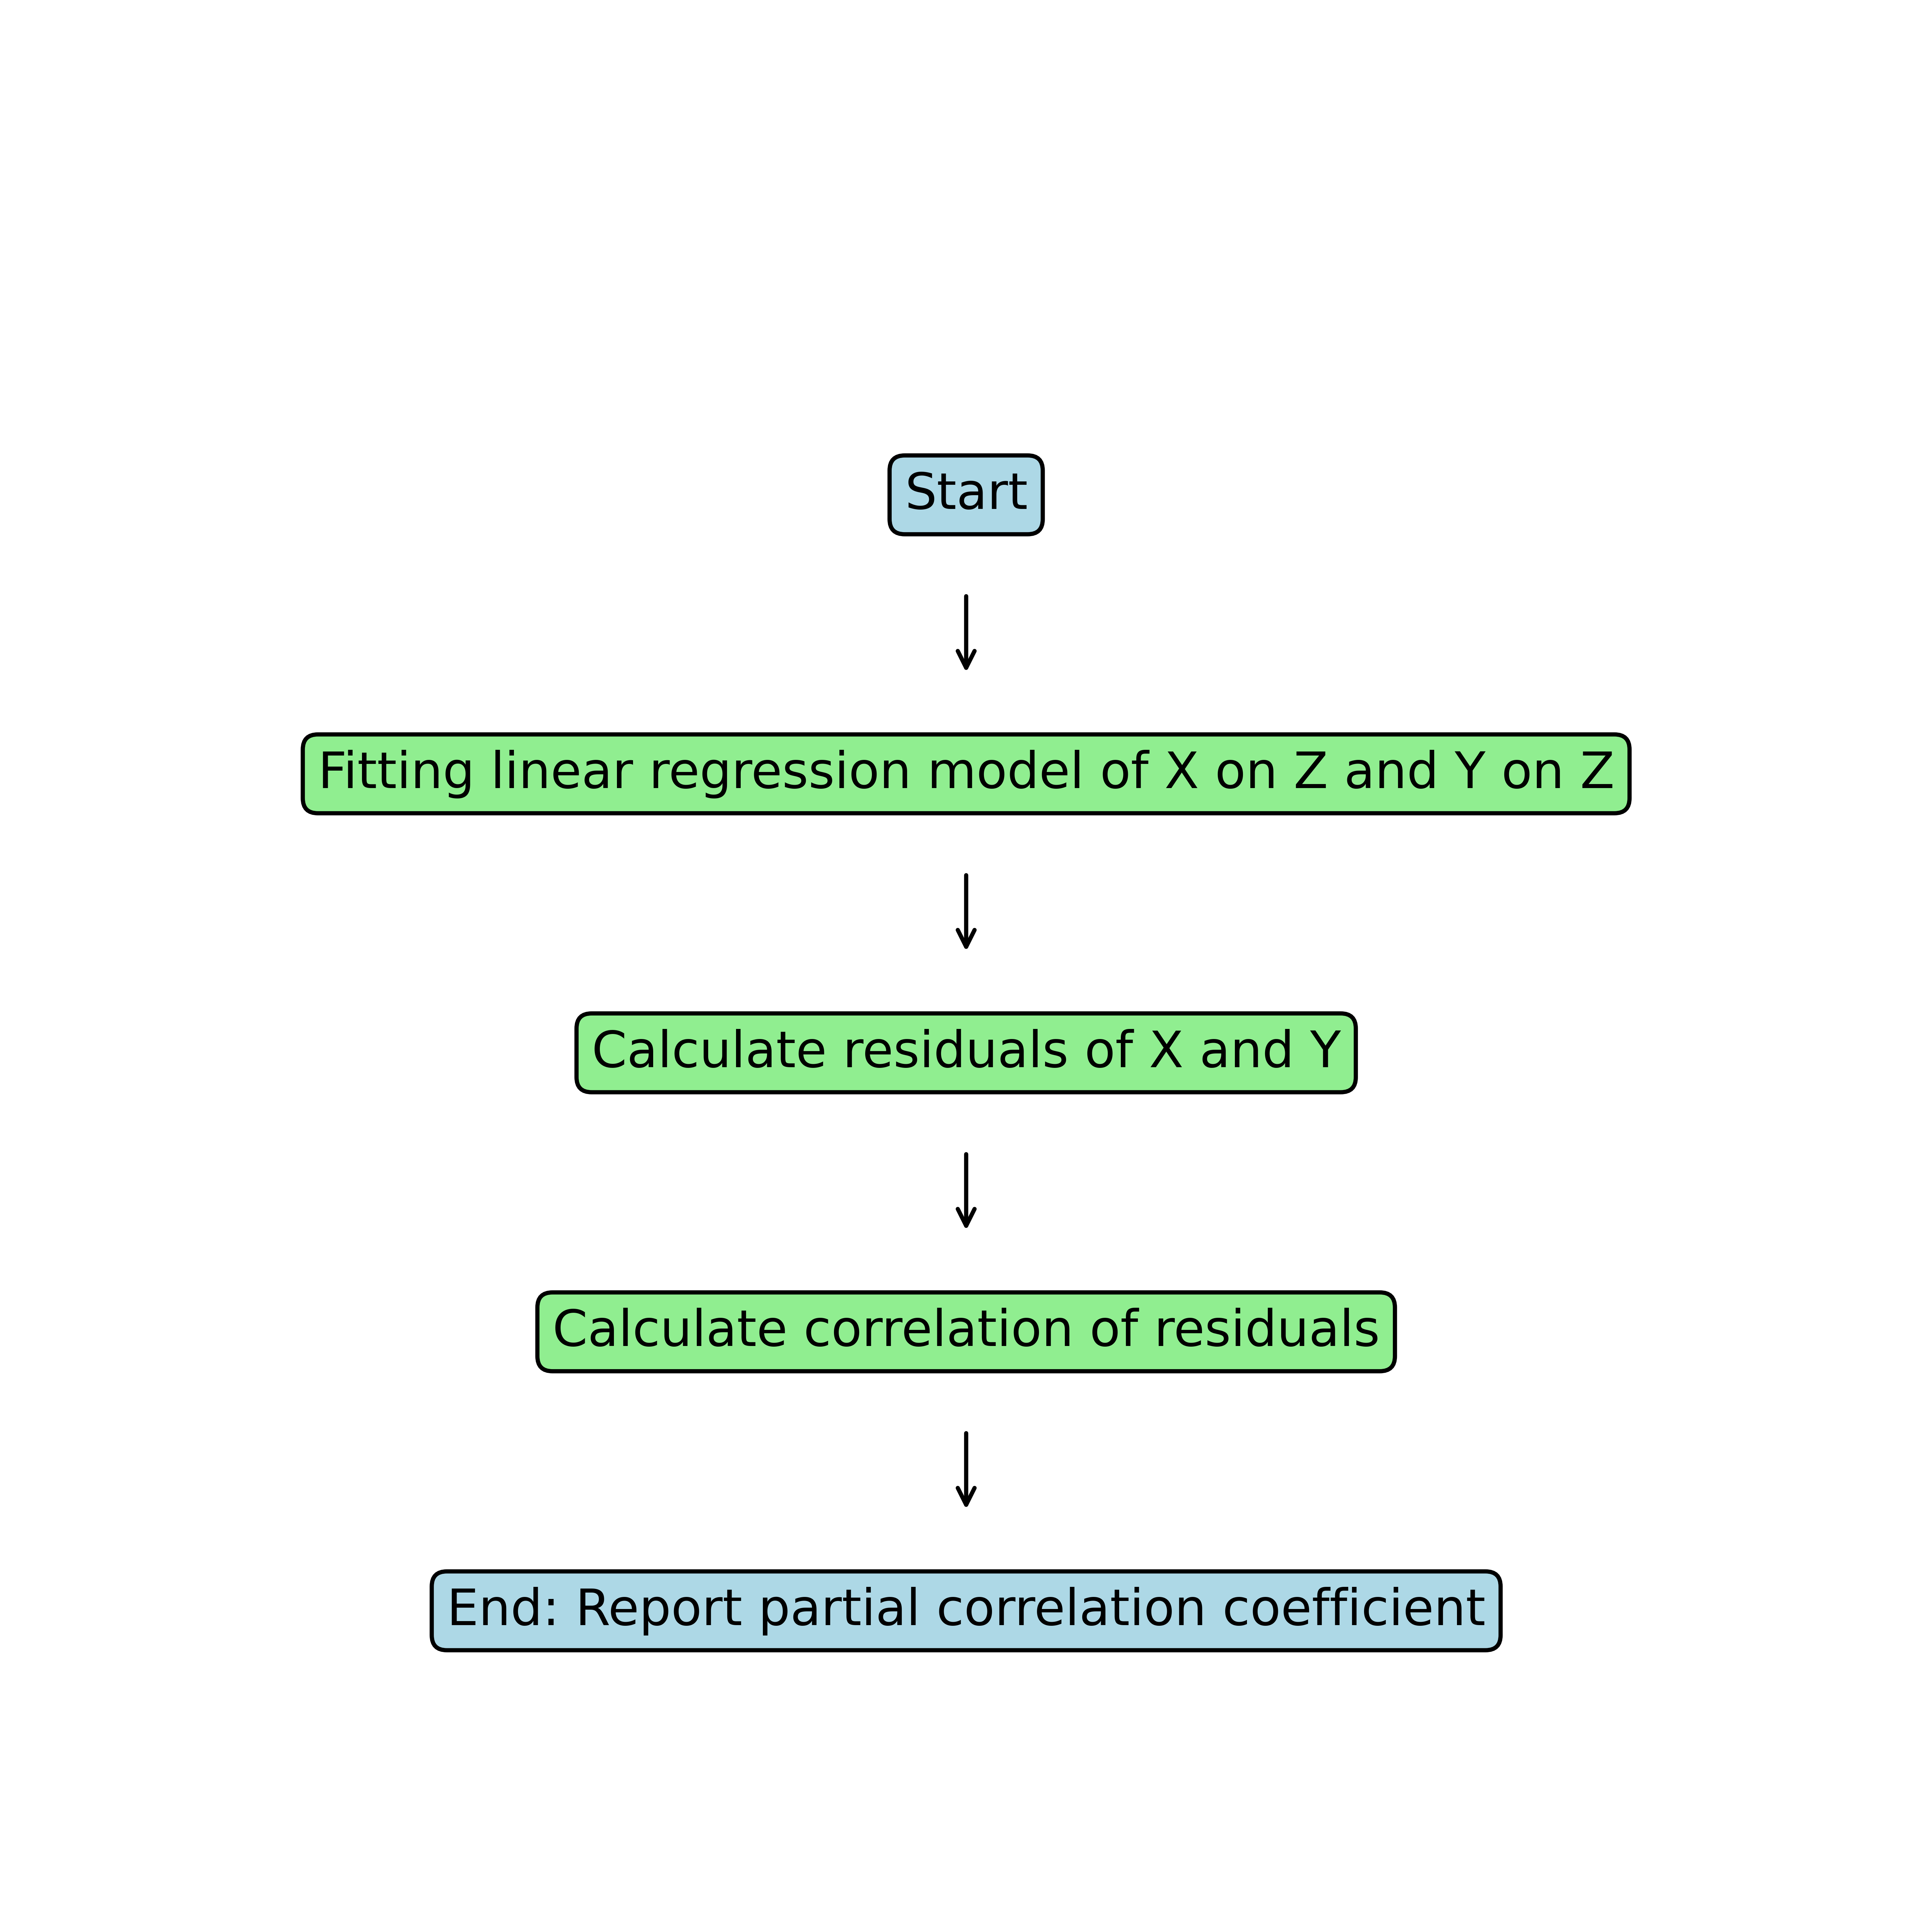

In [2]:
import matplotlib.pyplot as plt

# Create a flowchart for the partial correlation steps
fig, ax = plt.subplots(figsize=(8, 8), dpi=900)

# Define text boxes and arrows
ax.text(0.5, 0.75, 'Start', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))
#ax.text(0.5, 0.75, 'Generate synthetic variables (x, y, z)', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.5, 0.6, 'Fitting linear regression model of X on Z and Y on Z', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.5, 0.45, 'Calculate residuals of X and Y', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.5, 0.3, 'Calculate correlation of residuals', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen'))
ax.text(0.5, 0.15, 'End: Report partial correlation coefficient', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))

# Draw arrows
arrowprops=dict(arrowstyle='<-', linewidth=1, color='black')
# ax.annotate('', xy=(0.5, 0.85), xytext=(0.5, 0.8), arrowprops=arrowprops)
ax.annotate('', xy=(0.5, 0.7), xytext=(0.5, 0.65), arrowprops=arrowprops)
ax.annotate('', xy=(0.5, 0.55), xytext=(0.5, 0.5), arrowprops=arrowprops)
ax.annotate('', xy=(0.5, 0.4), xytext=(0.5, 0.35), arrowprops=arrowprops)
ax.annotate('', xy=(0.5, 0.25), xytext=(0.5, 0.2), arrowprops=arrowprops)

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.show()
